<a href="https://colab.research.google.com/github/BRIJNANDA1979/Segmenting-Kelp-Forests-/blob/main/1_bayes_model_KELP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 40.9 MB/s eta 0:00:00


In [ ]:
import rasterio
from rasterio.plot import show
import pandas as pd   ###https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.Rbf.html

In [71]:
import pandas as pd
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [69]:
kelp_files = os.listdir('/content/drive/MyDrive/kelp_files_only')

In [ ]:
######## now run the model for all kelp and not kelp files....

In [ ]:
step 1. train model with more samples from kelp and not kelp files.....

In [187]:
for file in kelp_files[0:1]:   ## just one file data to analyse...
   with rasterio.open('/content/drive/MyDrive/kelp_files_only/' + file) as src:
    swir=src.read(1)
    nir=src.read(2)
    red=src.read(3)
    green=src.read(4)
    ndvi = (nir - red) / (nir + red)
    ndwi = (green - nir) / (green + nir)
    mndwi = (green - swir) / (green + swir)
    with rasterio.open('/content/drive/MyDrive/train_kelp/' + file) as src:
      binary_kelp=src.read(1)
      for i in range(0,350):
        for j in range(0,350):
          if binary_kelp[i][j] == 1:
            swir[i][j] = swir[i][j]
            nir[i][j] = nir[i][j]
            red[i][j] = red[i][j]
            green[i][j] = green[i][j]
            ndvi[i][j] = ndvi[i][j]
            ndwi[i][j] = ndwi[i][j]
            mndwi[i][j] = mndwi[i][j]
          else:
            swir[i][j] = 0
            nir[i][j] = 0
            red[i][j] = 0
            green[i][j] = 0
            ndvi[i][j] = 0
            ndwi[i][j] = 0
            mndwi[i][j] = 0




/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [188]:
df_kelp = pd.DataFrame()  ########## 122500 pixels of one kelp file from train_satellite
df_kelp['swir'] = swir.flatten()
df_kelp['nir'] = nir.flatten()
df_kelp['red'] = red.flatten()
df_kelp['green'] = green.flatten()
df_kelp['ndvi'] = ndvi.flatten()
df_kelp['ndwi'] = ndwi.flatten()
df_kelp['mndwi'] = mndwi.flatten()


In [189]:
df_kelp.describe()

,swir,nir,red,green,ndvi,ndwi,mndwi
count,122500.000000,122500.000000,122500.000000,122500.000000,122500.000000,122500.000000,122500.000000
mean,30.422931,35.789927,32.567233,33.096000,0.000184,-0.000152,0.000165
std,484.892988,570.654071,518.996191,527.423068,0.003325,0.002912,0.002920
min,0.000000,0.000000,0.000000,0.000000,-0.035484,-0.107570,-0.029817
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10465.000000,10881.000000,10140.000000,9859.000000,0.110167,0.017332,0.094285


In [190]:

for file in not_kelp_files[0:1]:   ### just one file
   with rasterio.open('/content/drive/MyDrive/not_kelp_files/' + file) as src:

      swir=src.read(1)
      nir=src.read(2)
      red=src.read(3)
      green=src.read(4)

      ndvi = (nir - red) / (nir + red)
      ndwi = (green - nir) / (green + nir)
      mndwi = (green - swir) / (green + swir)




/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [191]:
df_not_kelp = pd.DataFrame()  ########## 122500 pixels of one kelp file from train_satellite
df_not_kelp['swir'] = swir.flatten()
df_not_kelp['nir'] = nir.flatten()
df_not_kelp['red'] = red.flatten()
df_not_kelp['green'] = green.flatten()
df_not_kelp['ndvi'] = ndvi.flatten()
df_not_kelp['ndwi'] = ndwi.flatten()
df_not_kelp['mndwi'] = mndwi.flatten()

In [192]:
df_not_kelp.describe()

,swir,nir,red,green,ndvi,ndwi,mndwi
count,122500.000000,122500.000000,122500.000000,122500.000000,122500.000000,122500.000000,122500.000000
mean,7707.061763,7958.077559,8011.128514,8267.027837,-0.003404,0.019065,0.036234
std,844.200493,615.386333,592.492727,622.550351,0.012409,0.014266,0.023120
min,6828.000000,7185.000000,7147.000000,7156.000000,-0.065920,-0.050132,-0.085158
25%,7437.000000,7818.000000,7714.000000,7897.000000,-0.011316,0.004963,0.024306
50%,7438.000000,7819.000000,7994.000000,8259.000000,-0.011131,0.027135,0.038210
75%,7653.000000,7820.000000,7998.000000,8266.000000,0.006696,0.027669,0.052424
max,15850.000000,14765.000000,14166.000000,14414.000000,0.049077,0.091472,0.124070


In [193]:
y = np.zeros(122500)
df_not_kelp['y'] = y

In [194]:
y=np.ones(122500)
df_kelp['y'] = y

In [195]:
df_total = pd.concat([df_kelp, df_not_kelp])

In [196]:
df_total.describe()

,swir,nir,red,green,ndvi,ndwi,mndwi,y
count,245000.000000,245000.000000,245000.000000,245000.000000,245000.000000,245000.000000,245000.000000,245000.000000
mean,3868.742347,3996.933743,4021.847873,4150.061918,-0.001610,0.009456,0.018200,0.500000
std,3899.570743,4005.358429,4027.980395,4157.204375,0.009259,0.014083,0.024429,0.500001
min,0.000000,0.000000,0.000000,0.000000,-0.065920,-0.107570,-0.085158,0.000000
25%,0.000000,0.000000,0.000000,0.000000,-0.011131,0.000000,0.000000,0.000000
50%,6828.000000,7500.000000,7429.000000,7526.000000,0.000000,0.000000,0.000000,0.500000
75%,7438.000000,7819.000000,7994.000000,8259.000000,0.000000,0.027135,0.038210,1.000000
max,15850.000000,14765.000000,14166.000000,14414.000000,0.110167,0.091472,0.124070,1.000000


In [199]:
# Import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler

# Sample data - you should replace this with your own dataset
# X represents the input features (text), y represents the labels
#X = df_both[['swir'] + ['nir'] + ['red'] + ['green'] + ['ndvi'] + ['ndwi'] + ['mndwi']]

X = df_total[['swir'] + ['nir'] + ['red'] + ['green'] + ['ndvi'] + ['ndwi'] + ['mndwi']]
y = df_total['y']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)



# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     24665
         1.0       1.00      1.00      1.00     24335

    accuracy                           1.00     49000
   macro avg       1.00      1.00      1.00     49000
weighted avg       1.00      1.00      1.00     49000



In [ ]:
################# TESING MODEL

/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


GN831063_kelp.tif


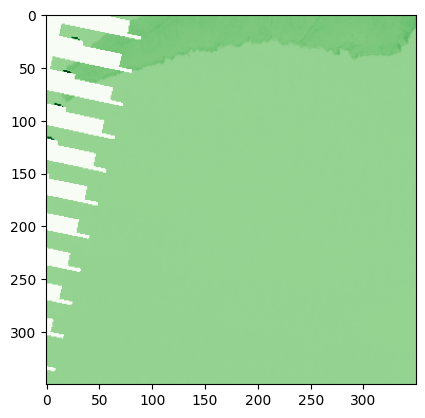

In [243]:
for file in kelp_files[100:101]:   ## just test model on a random one file data ..
   with rasterio.open('/content/drive/MyDrive/kelp_files_only/' + file) as src:
    swir=src.read(1)
    nir=src.read(2)
    red=src.read(3)
    green=src.read(4)
    ndvi = (nir - red) / (nir + red)
    ndwi = (green - nir) / (green + nir)
    mndwi = (green - swir) / (green + swir)
    print(file)
    show(swir,cmap='Greens')




In [244]:
swir.shape

(350, 350)

In [245]:
df_test = pd.DataFrame()
df_test['swir'] = swir.flatten()
df_test['nir'] = nir.flatten()
df_test['red'] = red.flatten()
df_test['green'] = green.flatten()
df_test['ndvi'] = ndvi.flatten()
df_test['ndwi'] = ndwi.flatten()
df_test['mndwi'] = mndwi.flatten()


In [246]:
df_test.describe()

,swir,nir,red,green,ndvi,ndwi,mndwi
count,122500.000000,122500.000000,122500.000000,122500.000000,122500.000000,122500.000000,122500.000000
mean,5737.490212,6092.431102,5498.810065,5843.375249,0.020547,0.001066,0.017822
std,10157.341242,10326.980248,9835.355336,9915.285326,0.076159,0.083753,0.068920
min,-32768.000000,-32768.000000,-32768.000000,-32768.000000,-0.031044,-0.365936,-0.784333
25%,7529.000000,7707.000000,7699.000000,8072.000000,-0.007021,0.022853,0.031368
50%,7529.000000,7709.000000,7817.000000,8217.000000,-0.000000,0.023179,0.040898
75%,7625.000000,7848.000000,7818.000000,8220.000000,0.001915,0.031911,0.043754
max,65535.000000,20544.000000,14290.000000,14036.000000,0.374206,0.059069,0.258926


In [247]:
X_test = df_test[['swir'] + ['nir'] + ['red'] + ['green'] + ['ndvi'] + ['ndwi'] + ['mndwi']]

In [248]:
X_test.shape

(122500, 7)

In [249]:
y_pred = nb_classifier.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


####### let us find ground truth value of

In [250]:
y_pred.shape

(122500,)

In [251]:
df_test['y_predicted'] = y_pred

/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


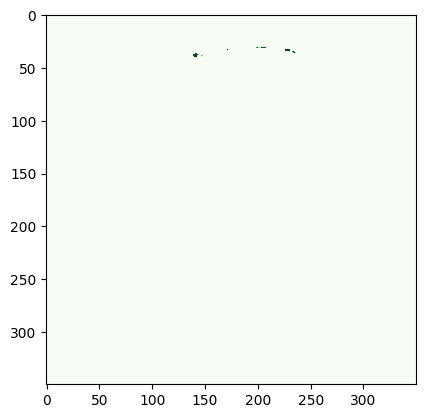

In [252]:
with rasterio.open('/content/drive/MyDrive/train_kelp/' + file) as src:
    ground_truth = src.read(1)
    show(ground_truth,cmap='Greens')

In [253]:
ground_truth.flatten().sum()

37

In [254]:
df_test['ground_truth'] = ground_truth.flatten()

In [255]:
df_test.head()

,swir,nir,red,green,ndvi,ndwi,mndwi,y_predicted,ground_truth
0,-32768,-32768,-32768,-32768,-0.0,-0.0,-0.0,1.0,0
1,-32768,-32768,-32768,-32768,-0.0,-0.0,-0.0,1.0,0
2,-32768,-32768,-32768,-32768,-0.0,-0.0,-0.0,1.0,0
3,-32768,-32768,-32768,-32768,-0.0,-0.0,-0.0,1.0,0
4,-32768,-32768,-32768,-32768,-0.0,-0.0,-0.0,1.0,0


In [256]:
df_test['ground_truth'].value_counts()

0    122463
1        37
Name: ground_truth, dtype: int64

In [257]:
df_test['y_predicted'].value_counts()

0.0    114943
1.0      7557
Name: y_predicted, dtype: int64

In [258]:
test_accuracy = accuracy_score(df_test['ground_truth'], df_test['y_predicted'])

In [259]:
test_accuracy                 #############  Good result......

0.9380081632653061

In [179]:
################   y_predict = C  convert C into output file for submission with cloud masking

In [260]:
C = df_test['y_predicted']


In [261]:
C


0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
122495    0.0
122496    0.0
122497    0.0
122498    0.0
122499    0.0
Name: y_predicted, Length: 122500, dtype: float64

In [262]:
C = np.array(C)
C =C*1

In [263]:
C = C.reshape(350,350)

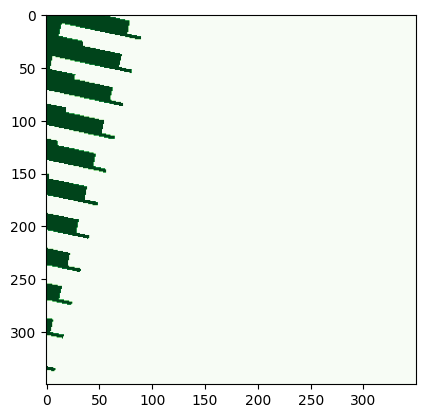

<Axes: >

In [264]:
show(C,cmap='Greens')

In [221]:
c= C.flatten()

In [222]:
c.sum()

0.0

In [ ]:
########################   write code for submission......

In [265]:
test_files = os.listdir('/content/drive/MyDrive/test_satellite')

/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


HP480632_satellite.tif


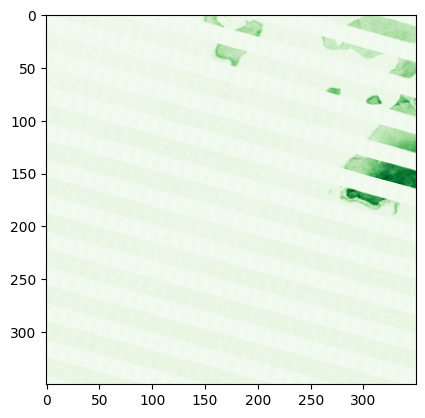

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


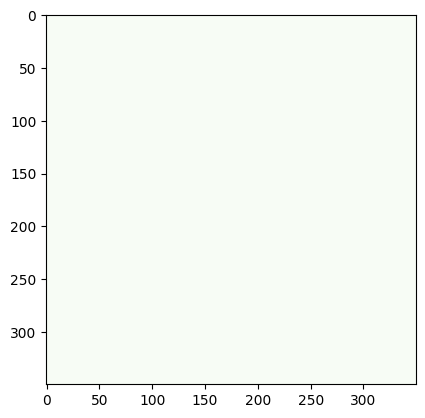

/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


HP504630_satellite.tif


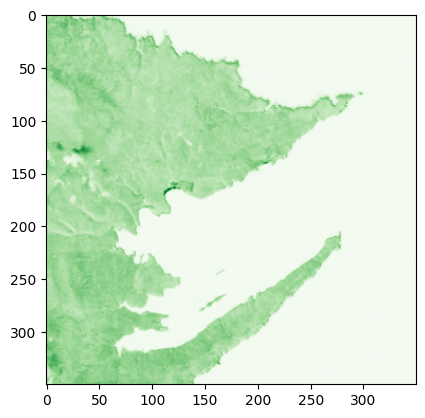

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


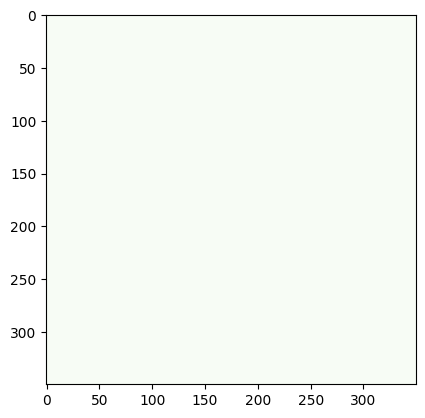

/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


HQ731262_satellite.tif


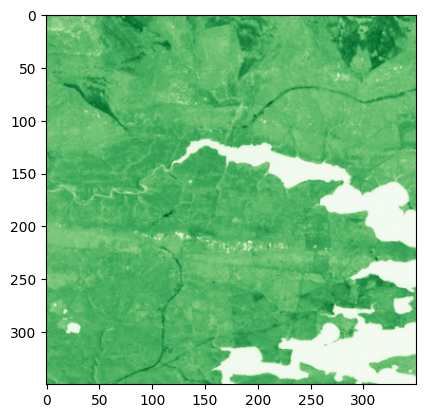

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


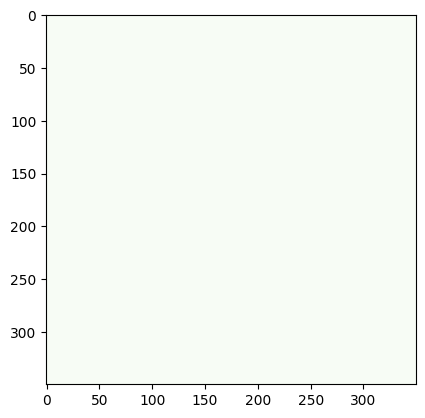

/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


HR677407_satellite.tif


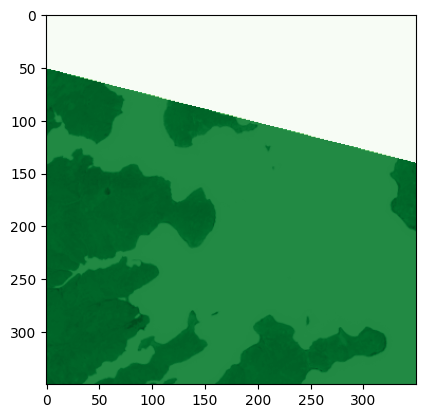

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


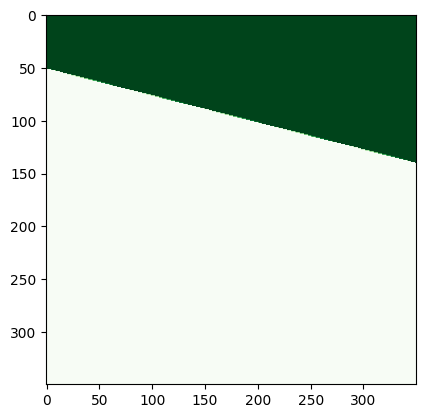

/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


HS330914_satellite.tif


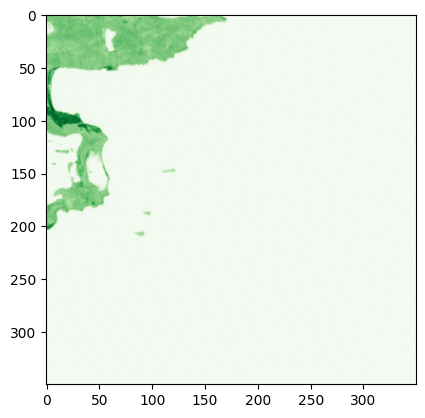

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


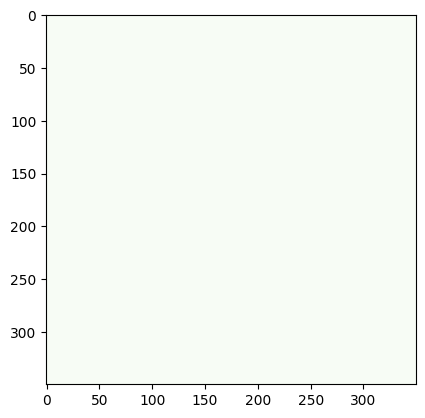

/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


HS391158_satellite.tif


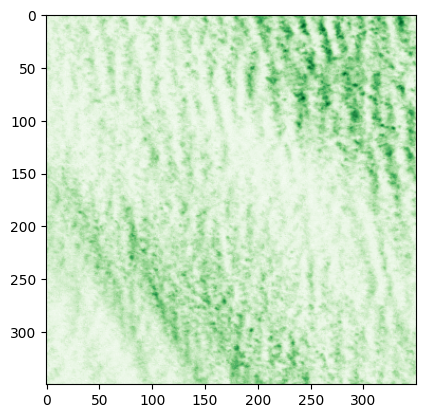

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


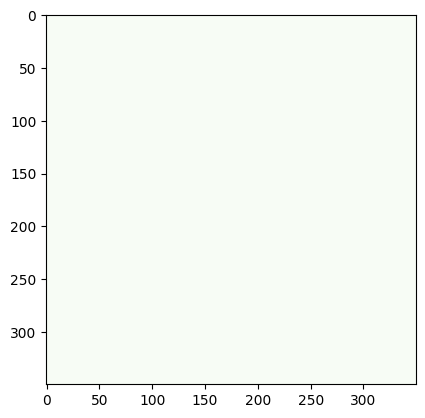

/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


HS439498_satellite.tif


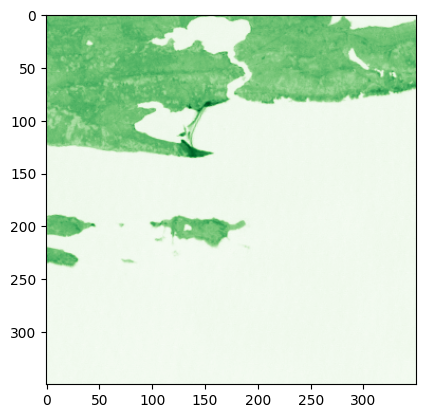

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


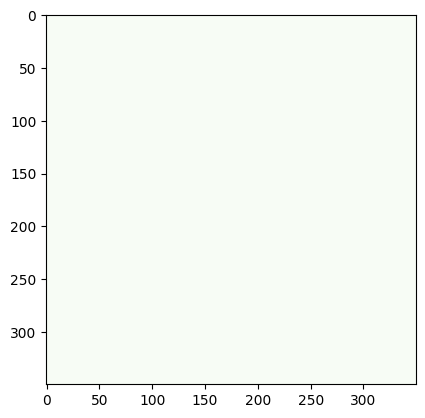

/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


HS536802_satellite.tif


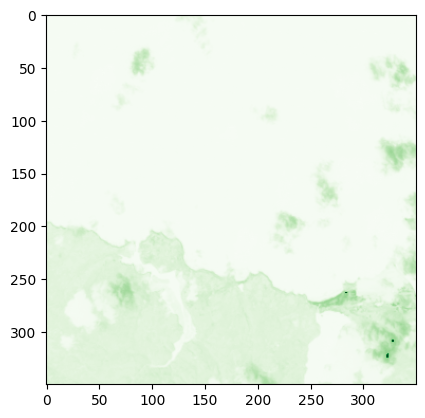

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


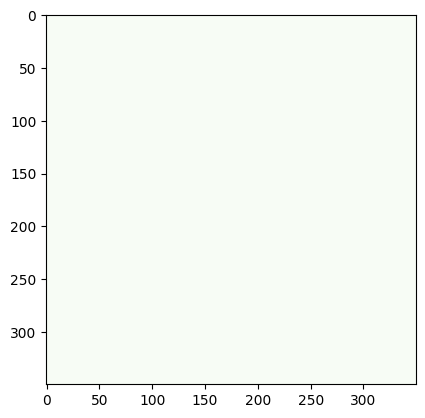

/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


HS571366_satellite.tif


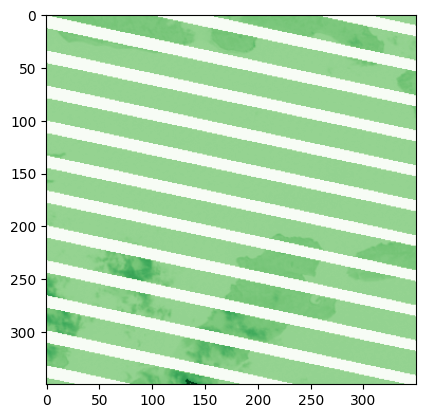

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


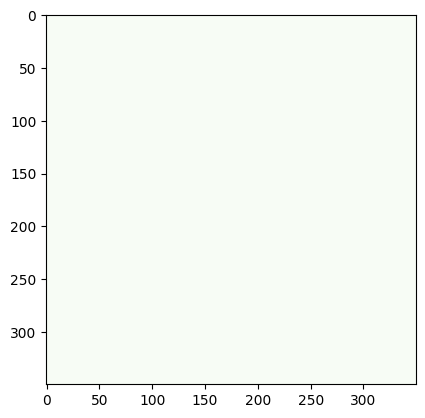

/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


HS646417_satellite.tif


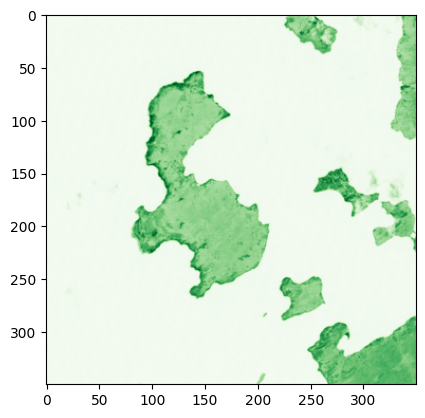

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


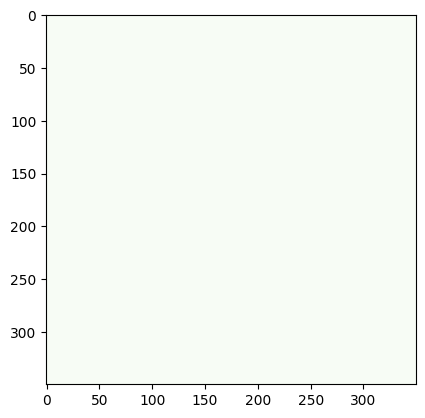

/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


HT224548_satellite.tif


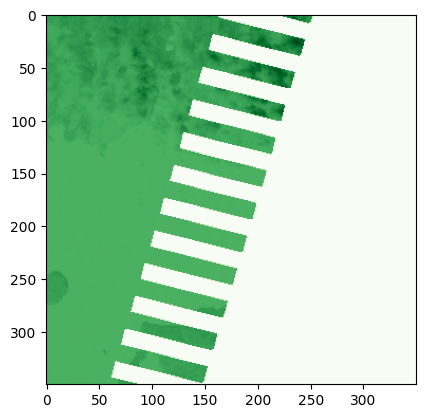

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


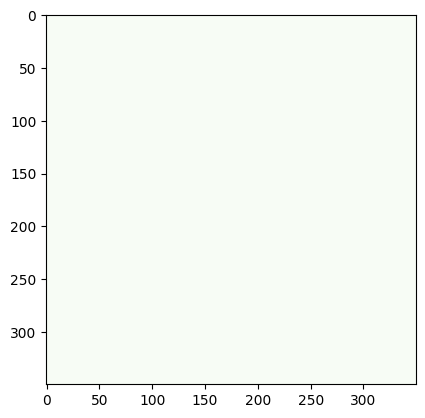

/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


HT329437_satellite.tif


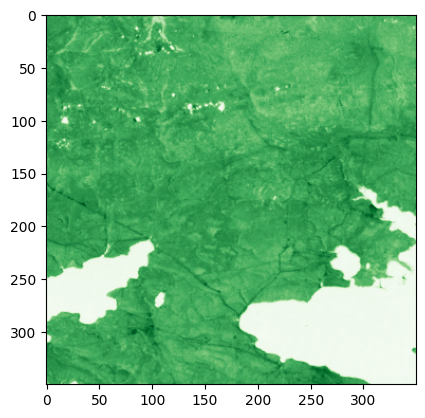

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


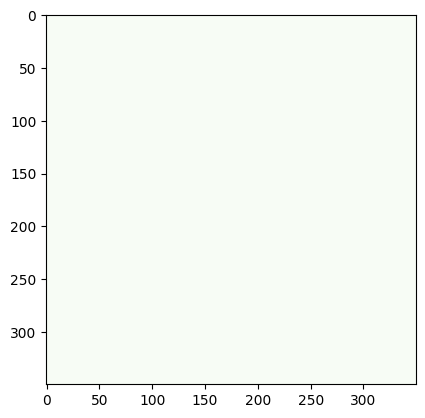

/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


HT473321_satellite.tif


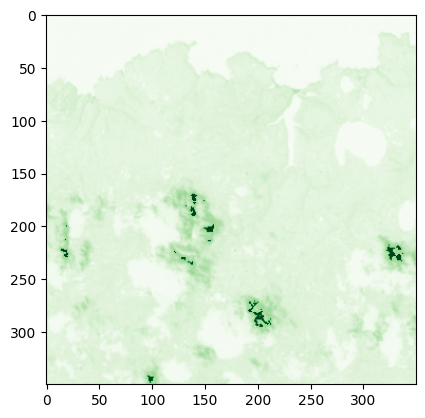

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


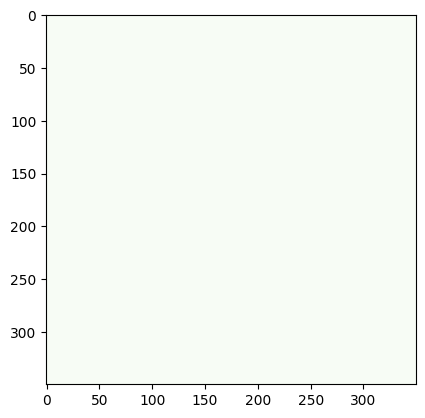

/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


HV292073_satellite.tif


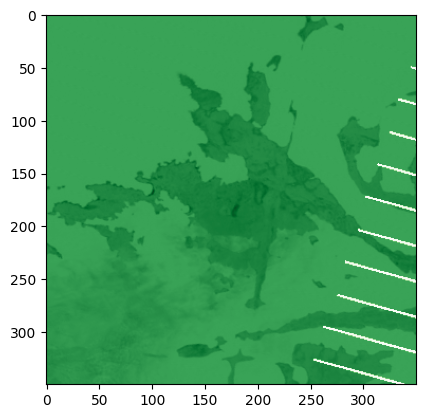

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


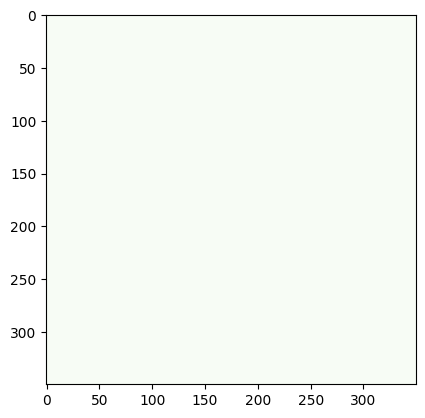

/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [ ]:
for file in test_files:
   with rasterio.open('/content/drive/MyDrive/test_satellite/' + file) as src:
    swir=src.read(1)
    nir=src.read(2)
    red=src.read(3)
    green=src.read(4)
    cloud = src.read(6)
    #show(cloud,cmap='Greens')
    ndvi = (nir - red) / (nir + red)
    ndwi = (green - nir) / (green + nir)
    mndwi = (green - swir) / (green + swir)
    print(file)
    show(swir,cmap='Greens')
    df_testing = pd.DataFrame()
    df_testing['swir'] = swir.flatten()
    df_testing['nir'] = nir.flatten()
    df_testing['red'] = red.flatten()
    df_testing['green'] = green.flatten()
    df_testing['ndvi'] = ndvi.flatten()
    df_testing['ndwi'] = ndwi.flatten()
    df_testing['mndwi'] = mndwi.flatten()
    X_testing = df_testing[['swir'] + ['nir'] + ['red'] + ['green'] + ['ndvi'] + ['ndwi'] + ['mndwi']]
    y_predicted_by_model = nb_classifier.predict(X_testing)
    df_testing['y_predicted'] = y_predicted_by_model
    C = df_testing['y_predicted']
    C = np.array(C)
    C =C*1
    C = C.reshape(350,350)
    #show(C,cmap='Greens')
    for j in range(350):
      for k in range(350):
        if cloud[j][k] == 1:    ##### masking output with cloud
          C[j][k] = 0
    show(C,cmap='Greens')

    meta = src.meta
    array = C
    with rasterio.Env():

    # Write an array as a raster band to a new 8-bit file. For
    # the new file's profile, we start with the profile of the source
          profile = src.profile

    # And then change the band count to 1, set the
    # dtype to uint8, and specify LZW compression.
          profile.update(
            dtype=rasterio.uint8,
            count=1,
            compress='lzw')
          s = file.split('_')
          ss = s[0] + '_kelp.tif'
          i+=1
          #print(ss)

          with rasterio.open('/content/drive/MyDrive/1/'+ss, 'w', **profile) as dst:
            dst.write(array.astype(rasterio.uint8), 1)




